In [1]:
from copy import deepcopy
from itertools import combinations
import typing as tp

import numpy as np
import pandas as pd
from numpy.linalg import lstsq
from scipy.optimize import linprog

from matplotlib import pyplot as plt
from citk.layer import Dense, FuzzyGMDHLayer
from citk.model import FFN, GMDH
from citk.functions import ReLU, Linear, BellMembership, GaussianMembership, Poly
from citk.losses import MSE, FMSE
from citk.optimisers import SGDOptimizer, SimplexOptimizer

from utils import get_and_process_boston_dataset, visualise_boston, seed_everything

%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

# Data

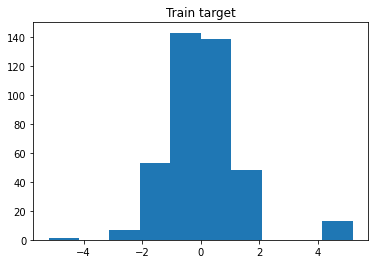

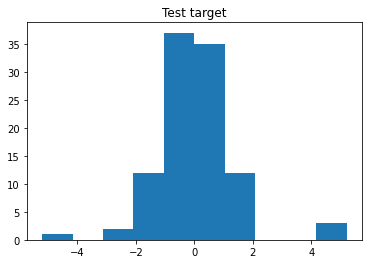

In [2]:
RANDOM_SEED = 42

seed_everything(RANDOM_SEED)

X_train, X_test, y_train, y_test = get_and_process_boston_dataset(random_state=RANDOM_SEED)

visualise_boston(X_train, X_test, y_train, y_test)

# GMDH 

In [3]:
model = GMDH(
            method_type='fuzzy', 
            poli_type='partial_quadratic',
            loss=MSE, 
            confidence=0.9,
        )

In [4]:
model, history, prediction, prediction_train  = model.fit(
    (X_train, y_train),
    (X_test, y_test),
    max_gmdh_layers=20,
    n_best_to_take=20,
    batch_size=64,
    verbose=True,
)

/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/_linprog.py:514: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)
/home/vsydorskyi/src/Neural_Net_Genetic_Alg/citk/utils.py:96: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  lp = linprog(obj_w, ineq_A, ineq_y, bounds=bounds, method='interior-point', x0=initial_x)
/home/vsydorskyi/src/Neural_Net_Genetic_Alg/citk/utils.py:96: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  lp = linprog(obj_w, ineq_A, ineq_y, bounds=bounds, method='interior-point', x0=initial_x)
/home/vsydor


Layer: 0. Metric: 0.9710134637835535



Layer: 1. Metric: 0.7555686594888832



Layer: 2. Metric: 0.5880612778890367



Layer: 3. Metric: 0.5232417314140079



Layer: 4. Metric: 0.5139065583038438



Layer: 5. Metric: 0.5124352545014115



Layer: 6. Metric: 0.5111516673532057


/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.26094e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.78378e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=3.32279e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=2.01581e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-pack

/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:110: LinAlgWarning: Ill-conditioned matrix (rcond=1.59489e-35): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:368: RuntimeWarning: invalid value encountered in less
  i_x = d_x < 0
/home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:369: RuntimeWarning: invalid value encountered in less
  i_z = d_z < 0
/home/vsydorskyi/src/Neural_Net_Genetic_Alg/citk/model.py:395: UserWarning: Something gone wrong in simplex
  warnings.warn("Something gone wrong in simplex")
/home/vsydorskyi/src/Neural_Net_Genetic_Alg/citk/model.py:412: UserWarning: Something gone wrong in simplex
  warnings.warn("Something gone wrong in simplex")


# Predict and Visualise losses

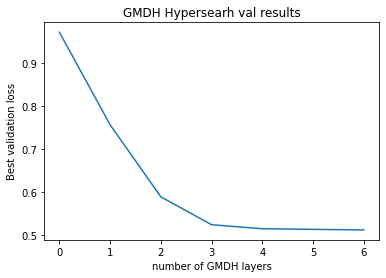

In [5]:
plt.title('GMDH Hypersearh val results')
plt.plot(history['metric'])
plt.xlabel('number of GMDH layers')
plt.ylabel('Best validation loss')
plt.show()

In [6]:
print(f"Test MSE: {MSE(y_test, prediction)[0]}")
print(f"Train MSE: {MSE(y_train, prediction_train)[0]}")

Test MSE: 0.5111516673532057
Train MSE: 0.5583572608597993


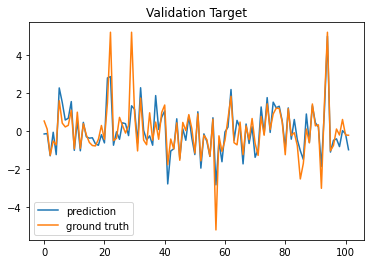

In [7]:
plt.title('Validation Target')
plt.plot(prediction, label='prediction')
plt.plot(y_test, label='ground truth')
plt.legend()
plt.show()

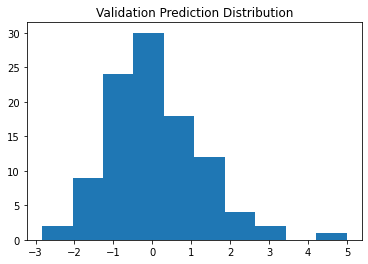

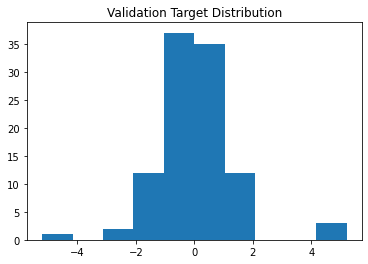

In [8]:
plt.title('Validation Prediction Distribution')
plt.hist(prediction)
plt.show()

plt.title('Validation Target Distribution')
plt.hist(y_test)
plt.show()